In [1]:
from alpha_vantage.timeseries import TimeSeries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as se
se.set()

In [217]:
#shorts = ['SQQQ','SPXU','SDOW','SRTY']
DOW = ['MMM','AXP','AAPL','BA',
       'CAT','CVX','CSCO','KO',
       'DIS','DOW','XOM','GS',
      'HD','IBM','INTC','JNJ',
      'JPM','MCD','MRK','MSFT',
      'PFE','PG','TRV','UTX',
      'UNH','VZ','V','WMT','WBA']

In [329]:
#prepare the data
def p_return(df):
    df_op = df["1. open"].values
    df_cl = df["4. close"].values
    p = ((df_op*(df_op-df_cl))/df_op)
    return p

v = []

startDate = '2019-1-20'
endDate = '2020-3-14'


buy=np.empty(29)
sell=np.empty(29)

i = 0 
for s in DOW:
    fn = "DOW/" + s + ".csv"
    temp = pd.read_csv(fn,usecols=["date","1. open","4. close"]
                       ,engine='c',index_col=0)
    v.append(p_return(
        temp[(temp.index >= startDate) & (temp.index <= endDate )])
            )
    buy[i]=temp["1. open"][0]
    sell[i]=temp["4. close"][-1]
    i+=1

In [330]:
#covariance matrix
sigma = np.cov(v)

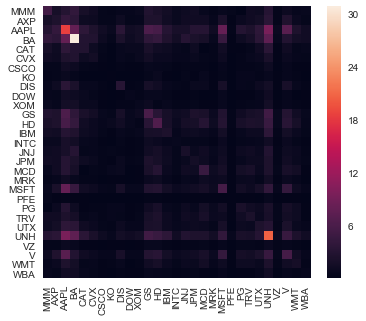

In [331]:
#covariance heat map
plt.figure(figsize=(6,5))
se.heatmap(sigma,xticklabels=DOW,yticklabels=DOW,)

In [351]:
#Invers varience portfolio
#R
v = np.diag(sigma)
portfolio = v**(-1)/sum(v**(-1))
R = (np.dot(sell,portfolio)-np.dot(buy,portfolio))/np.dot(buy,portfolio)
print("Return on invers varience portfolio %.4f" %(R))

Return on invers varience portfolio -0.0011


In [333]:
##First Fixed Point

#init weights to invers var
v = np.diag(sigma)
w = (1/v)/sum(1/v)

#alloc
F = w
#first fixed point
F = (1/v*w)/sum(1/v*w)

In [361]:
#Variance of inverse weighted 
v1 = np.dot(np.dot(np.transpose(w),sigma),w)
v2 = np.dot(np.dot(np.transpose(F),sigma),F)
print("Variance of inverse weighted: %.4f \nVariance of first Fixed Point: %.4f" %(v1,v2))

Variance of inverse weighted: 0.1603 
Variance of first Fixed Point: 0.1322


In [336]:
#Fix point
#init weights to invers var
v = np.diag(sigma)
w = (1/v)/sum(1/v)

n=10
Fs = np.empty(n)
error = np.empty(n)
Fs[0] = np.dot(np.dot(np.transpose(w),sigma),w)
for i in range(1,n):
    w = (1/v*w)/sum(1/v*w)
    Fs[i] = np.dot(np.dot(np.transpose(w),sigma),w)
    error[i]=(abs(Fs[i-1]-Fs[i]))

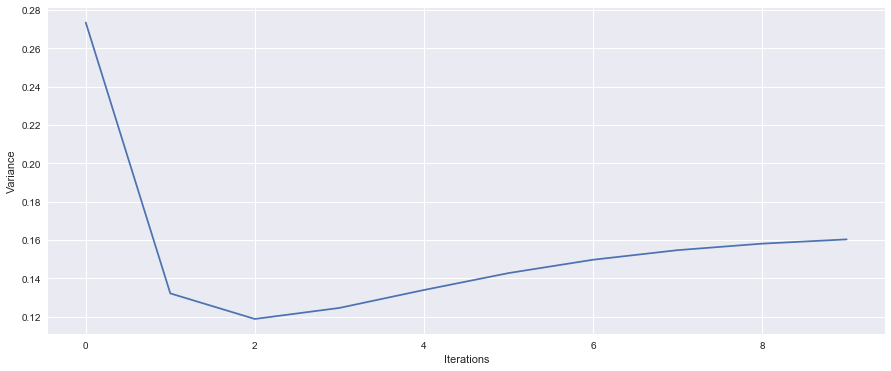

In [367]:
fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(15)

ax.set_ylabel("Variance")
ax.set_xlabel("Iterations")
ax.plot(Fs)

In [353]:
 
R=(np.dot(sell,w)-np.dot(buy,w))/np.dot(buy,w)
print("Return on Risk Parity Portfolio %.4f" %(R))

Return on Risk Parity Portfolio 0.0191
